# Άσκηση 1

## Ερώτηση 1

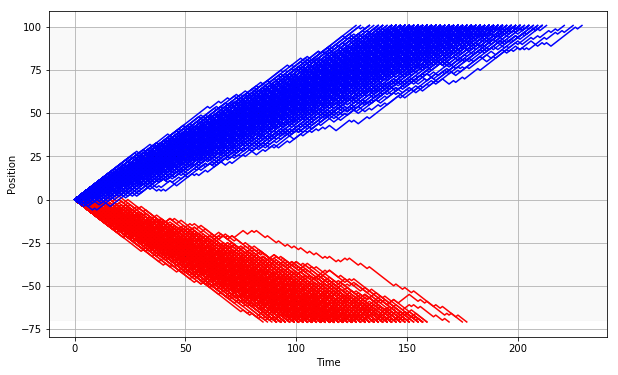

In [2]:
import numpy as np
from numpy.random import choice

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)  # default figure size

np.random.seed(2017) # for reproducibility

# random walk generator:
def rand_left_walk_Z(start = 0, probs = (0.8, 0.2)):
    x = start
    steps = [-1, 1]  # probs order should be (left, right)
    while True:  # continue for ever in needed
        x += choice(steps, p=probs)
        yield x  # it's a generator!

# random walk generator:
def rand_right_walk_Z(start = 0, probs = (0.2, 0.8)):
    x = start
    steps = [-1, 1]  # probs order should be (left, right)
    while True:  # continue for ever in needed
        x += choice(steps, p=probs)
        yield x  # it's a generator!

fig, ax = plt.subplots()  # initiate plots

a = -70  # lower boundary
b = 100  # upper boundary

right_escape_time = np.zeros(500, dtype=int)
left_escape_time = np.zeros(500, dtype=int)

for col in ['red', 'blue']:  
    if col == 'red':
        for i in range(500):
            walker = rand_left_walk_Z()  # start new walk from 0
            x = 0  # start position 0
            t = 0 # exit time
            chain = [x]  # save positions to plot
            while a <= x <= b:
                x = next(walker)
                chain.append(x)
                t += 1
            left_escape_time[i] = t
            ax.plot(chain, color=col)
    else :
        for i in range(500):
            walker = rand_right_walk_Z()  # start new walk from 0
            x = 0  # start position 0
            t = 0 # exit time
            chain = [x]  # save positions to plot
            while a <= x <= b:
                x = next(walker)
                chain.append(x)
                t += 1
            right_escape_time[i] = t
            ax.plot(chain, color=col)
        

# To look nicer
plt.axhspan(a, b, color = '#cccccc', alpha = 0.1)  # box between a & b
ax.grid()  # adds grid lines
plt.xlabel('Time')
plt.ylabel('Position')

# Show image!
plt.show()

Όπως αναμέναμε οι περίπατοι που έχουν αριστερές τάσεις διέφυγαν από το κάτω όριο του διαστήματος, ενώ το αντίθετο συνέβη για αυτούς με την δεξιά τάση.

## Ερώτηση 2

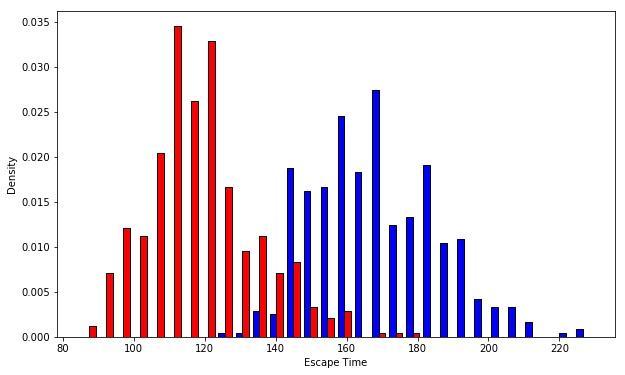

In [3]:
plt.hist((right_escape_time, left_escape_time), bins=30, edgecolor='black', color=('blue', 'red'), normed=True)
plt.xlabel('Escape Time')
plt.ylabel('Density')
plt.show()

Παρατηρούμε πως οι περίπατοι με τις αριστερές τάσεις έχουν κατά κανόνα μικρότερους χρόνους διαφυγής απ' το διάστημα $[-70,100]$ σε σχέση με τους περιπάτους με την ανάποδη τάση. Αυτό προφανώς οφείλεται στο γεγονός πως το διάστημα μας είναι πιο "κοντό" απ'τα αριστερά, δηλαδή η απόσταση του $-70$ απ'το $0$ είναι μικρότερη απ'αυτή του $0$ απ'το $100$, με αποτέλεσμα οι κόκκινοι περίπατοι να διαφεύγουν πιο γρήγορα.

# Άσκηση 2

## Ερώτηση 1

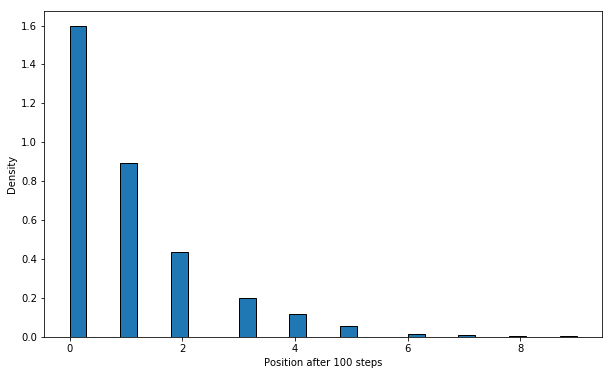

In [22]:
# random walk generator:
def rand_walk_Zplus(start = 0, probs = (2/3, 1/3)):
    x = start
    steps = [-1, 1]  # probs order should be (left, right)
    while True:  # continue for ever in needed
        if x == 0 :
            x+= choice([0, 1], p=probs)
            yield x
        else :
            x += choice(steps, p=probs)
            yield x  # it's a generator!

x_100 = np.zeros(1000, dtype=int)
for i in range(1000):
            walker = rand_walk_Zplus()  # start new walk from 0
            x = 0  # start position 0
            for j in range(100):
                x = next(walker)
            x_100[i] = x

plt.hist(x_100, bins=30, edgecolor='black', normed=True)
plt.xlabel('Position after 100 steps')
plt.ylabel('Density')
plt.show()

## Ερώτηση 2

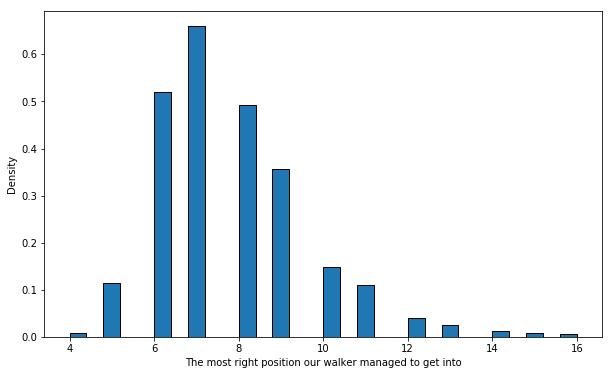

In [25]:
right_pos = np.zeros(1000, dtype=int)
for i in range(1000):
            walker = rand_walk_Zplus()  # start new walk from 0
            x = 0  # start position 0
            right_pos[i] = x
            for j in range(1000):
                x = next(walker)
                if x > right_pos[i] : right_pos[i] = x

plt.hist(right_pos, bins=30, edgecolor='black', normed=True)
plt.xlabel('The most right position our walker managed to get into')
plt.ylabel('Density')
plt.show()

In [26]:
import statistics as stat

print(
    """ 
    The sample mean is {0:.5f} and the sample variance is {1:.5f}
    """.format(stat.mean(right_pos), stat.variance(right_pos))
)


 
    The sample mean is 7.00000 and the sample variance is 3.00000
    


# Άσκηση 3

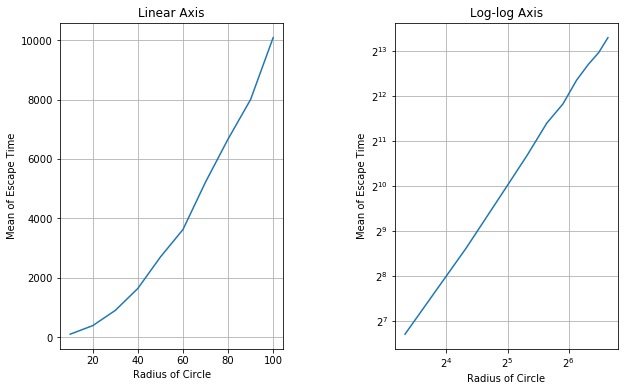

In [32]:
# random walk in Z^2 generator:
def rand_walk_Z2(start=(0, 0), probs=(0.25, 0.25, 0.25, 0.25)):
    # probs order (left, right, bottom, up)
    x, y = start
    steps = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    while True:
        dx, dy = steps[choice(4, p=probs)]  # choice(4) = choose a number in [0,3]
        x, y = x + dx, y + dy
        yield x, y
        
mean_esct = []
Radius = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for r in Radius:
    r2 = r**2  # square of radius
    N = 500  # sample size
    escape_time = np.zeros(N, dtype=int)  # to store the exit time
    for n in range(N):
        walker = rand_walk_Z2()
        x, y = (0, 0)
        t = 0
        while x**2 + y**2 < r2:
            x, y = next(walker)
            t += 1
        escape_time[n] = t
        
    mean_esct.append(stat.mean(escape_time))

y = mean_esct
x = Radius

plt.subplot(1, 2, 1)  
plt.plot(x, y)
plt.xlabel('Radius of Circle')
plt.ylabel('Mean of Escape Time')
plt.title('Linear Axis')
plt.grid(True)  

plt.subplot(1, 2, 2)
plt.loglog(x, y, basex=2, basey=2)
plt.xlabel('Radius of Circle')
plt.ylabel('Mean of Escape Time')
plt.title('Log-log Axis')
plt.grid(True)

plt.subplots_adjust(wspace = 0.5)  # specify the width space

Η σχέση των 2 μεταβλητών φαίνεται λογαριθμική.